In [31]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import joblib


In [16]:
df=pd.read_csv('wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [17]:
print(df.duplicated().sum())
df.info()

0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [18]:
df.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [19]:
df.isna().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

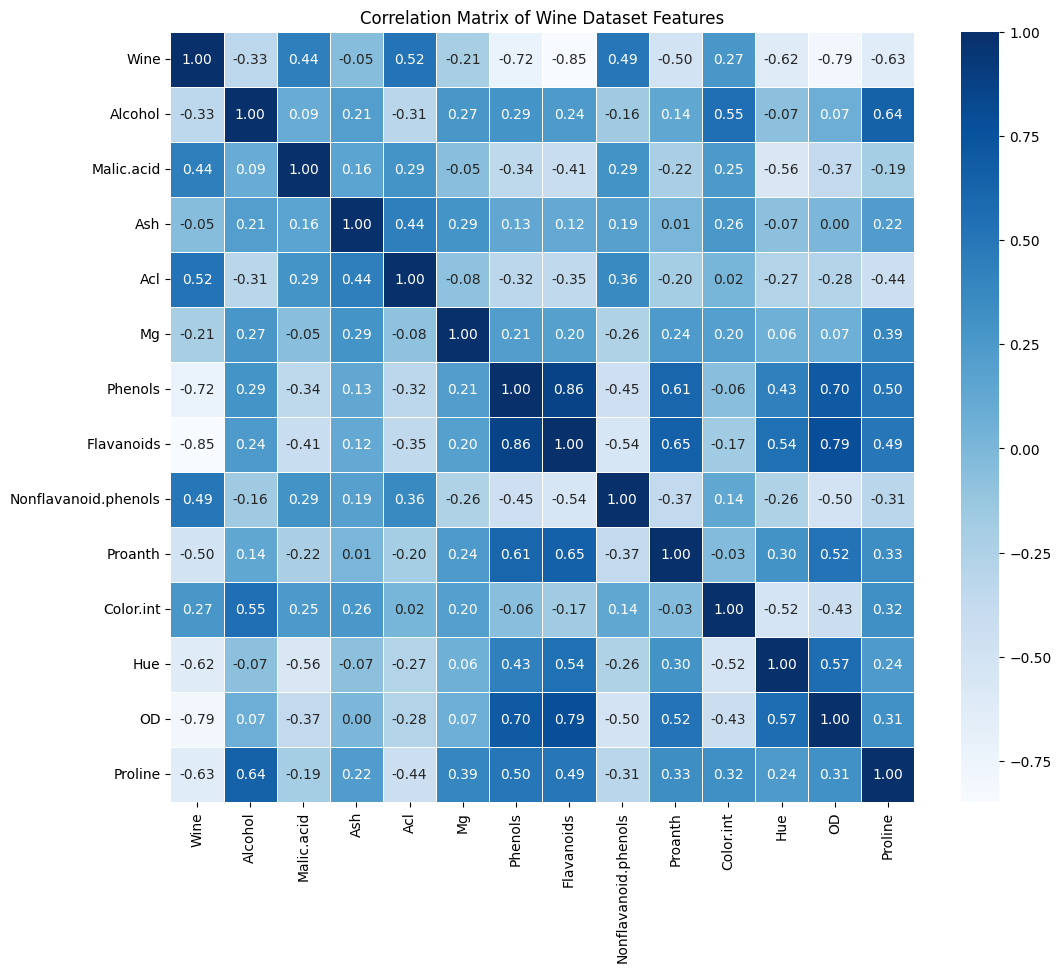

Dropped features: ['Ash']


In [20]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Wine Dataset Features")
plt.show()

corr_matrix = df.corr()
target_corr = corr_matrix['Wine'].drop('Wine')  # exclude self-correlation
selected_features = target_corr[abs(target_corr) >= 0.1].index.tolist()

# Optionally show which were dropped
dropped_features = target_corr[abs(target_corr) < 0.1].index.tolist()
print("Dropped features:", dropped_features)

# Create reduced DataFrame
df_reduced = df[selected_features + ['Wine']]


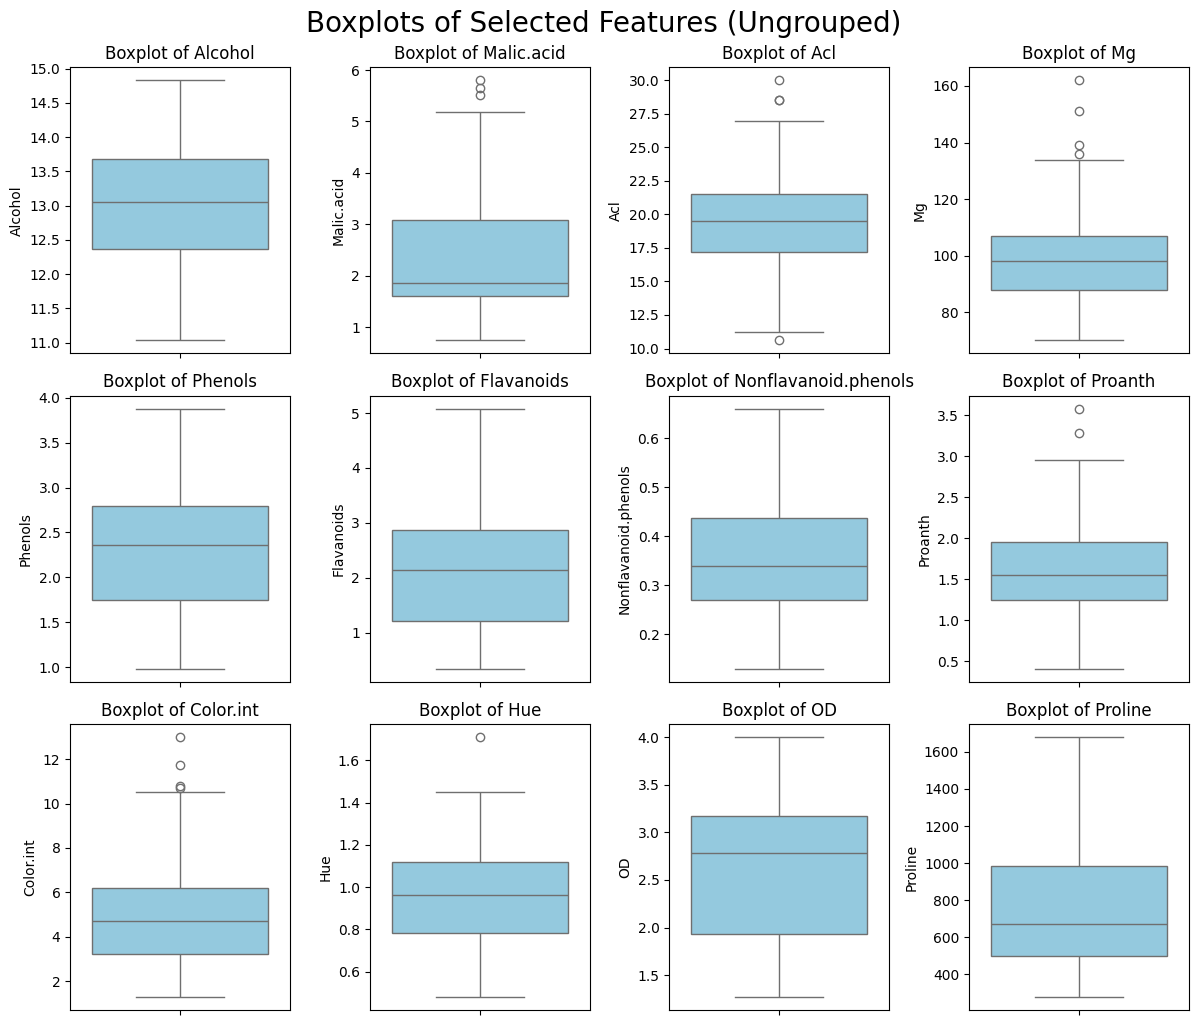

In [21]:
plt.figure(figsize=(12, 10))
n_cols = 4
n_rows = (len(selected_features) + n_cols - 1) // n_cols

for i, feature in enumerate(selected_features, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df_reduced[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel('')
    plt.ylabel(feature)

plt.tight_layout()
plt.suptitle("Boxplots of Selected Features (Ungrouped)", fontsize=20, y=1.02)
plt.show()

In [ ]:
features = df_reduced.drop(['Wine'], axis=1)
target = df_reduced['Wine']
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])
knn_pipeline.fit(x_train, y_train)
knn_scores = cross_val_score(knn_pipeline, x_train, y_train, cv=5)
print("KNN Test Accuracy:", knn_pipeline.score(x_test, y_test))
print("KNN CV Scores:", knn_scores)
print("KNN CV Best:", np.max(knn_scores))
print("KNN CV Mean:", np.mean(knn_scores))
print("KNN CV Diff:", np.max(knn_scores) - np.mean(knn_scores))

nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])
nb_pipeline.fit(x_train, y_train)
nb_scores = cross_val_score(nb_pipeline, x_train, y_train, cv=5)
print("Naive Bayes Test Accuracy:", nb_pipeline.score(x_test, y_test))
print("Naive Bayes CV Scores:", nb_scores)
print("Naive Bayes CV Best:", np.max(nb_scores))
print("Naive Bayes CV Mean:", np.mean(nb_scores))
print("Naive Bayes CV Diff:", np.max(nb_scores) - np.mean(nb_scores))

dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])
dt_pipeline.fit(x_train, y_train)
dt_scores = cross_val_score(dt_pipeline, x_train, y_train, cv=5)
print("Decision Tree Test Accuracy:", dt_pipeline.score(x_test, y_test))
print("Decision Tree CV Scores:", dt_scores)
print("Decision Tree CV Best:", np.max(dt_scores))
print("Decision Tree CV Mean:", np.mean(dt_scores))
print("Decision Tree CV Diff:", np.max(dt_scores) - np.mean(dt_scores))

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])
lr_pipeline.fit(x_train, y_train)
lr_scores = cross_val_score(lr_pipeline, x_train, y_train, cv=5)
print("Logistic Regression Test Accuracy:", lr_pipeline.score(x_test, y_test))
print("Logistic Regression CV Scores:", lr_scores)
print("Logistic Regression CV Best:", np.max(lr_scores))
print("Logistic Regression CV Mean:", np.mean(lr_scores))
print("Logistic Regression CV Diff:", np.max(lr_scores) - np.mean(lr_scores))

KNN Test Accuracy: 0.9814814814814815
KNN CV Scores: [0.88 0.92 0.96 0.92 1.  ]
KNN CV Best: 1.0
KNN CV Mean: 0.9359999999999999
KNN CV Diff: 0.06400000000000006
Naive Bayes Test Accuracy: 0.9814814814814815
Naive Bayes CV Scores: [1.   0.92 1.   0.92 1.  ]
Naive Bayes CV Best: 1.0
Naive Bayes CV Mean: 0.968
Naive Bayes CV Diff: 0.03200000000000003
Decision Tree Test Accuracy: 0.9629629629629629
Decision Tree CV Scores: [0.88       0.88       0.92       0.96       0.83333333]
Decision Tree CV Best: 0.96
Decision Tree CV Mean: 0.8946666666666667
Decision Tree CV Diff: 0.06533333333333324
Logistic Regression Test Accuracy: 0.9814814814814815
Logistic Regression CV Scores: [0.92 0.92 0.96 0.96 1.  ]
Logistic Regression CV Best: 1.0
Logistic Regression CV Mean: 0.952
Logistic Regression CV Diff: 0.04800000000000004


In [33]:
x_train.head()

,Alcohol,Malic.acid,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
138,13.49,3.59,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580
104,12.51,1.73,20.5,85,2.20,1.92,0.32,1.48,2.94,1.04,3.57,672
78,12.33,0.99,14.8,136,1.90,1.85,0.35,2.76,3.40,1.06,2.31,750
36,13.28,1.64,15.5,110,2.60,2.68,0.34,1.36,4.60,1.09,2.78,880
93,12.29,2.83,18.0,88,2.45,2.25,0.25,1.99,2.15,1.15,3.30,290


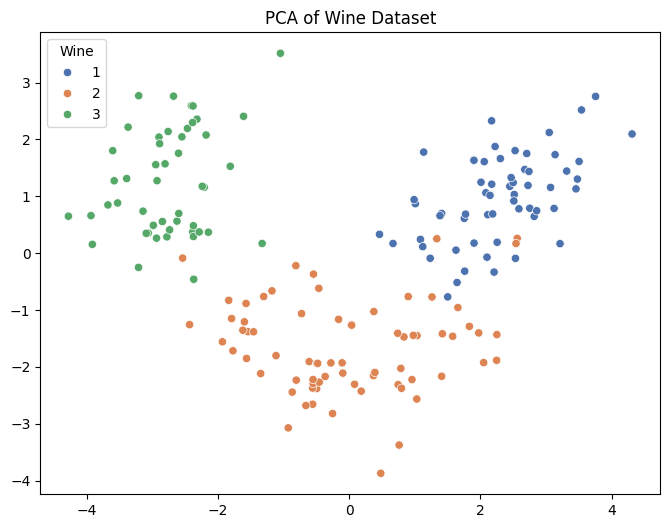

In [27]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop('Wine', axis=1))
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['Wine'], palette='deep')
plt.title("PCA of Wine Dataset")
plt.show()


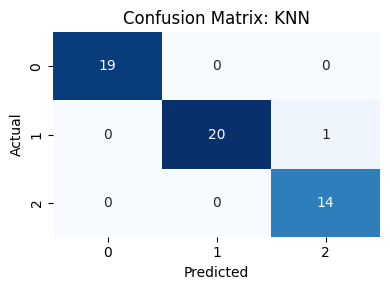

Classification Report: KNN
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



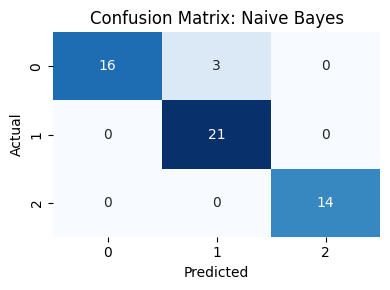

Classification Report: Naive Bayes
              precision    recall  f1-score   support

           1       1.00      0.84      0.91        19
           2       0.88      1.00      0.93        21
           3       1.00      1.00      1.00        14

    accuracy                           0.94        54
   macro avg       0.96      0.95      0.95        54
weighted avg       0.95      0.94      0.94        54



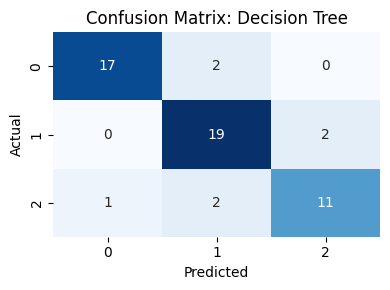

Classification Report: Decision Tree
              precision    recall  f1-score   support

           1       0.94      0.89      0.92        19
           2       0.83      0.90      0.86        21
           3       0.85      0.79      0.81        14

    accuracy                           0.87        54
   macro avg       0.87      0.86      0.87        54
weighted avg       0.87      0.87      0.87        54



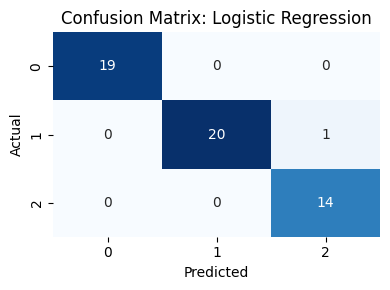

Classification Report: Logistic Regression
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        19
           2       1.00      0.95      0.98        21
           3       0.93      1.00      0.97        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



In [30]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

y_pred_knn = cross_val_predict(knn_pipeline, x_test, y_test, cv=3)
y_pred_nb = cross_val_predict(nb_pipeline, x_test, y_test, cv=3)
y_pred_dt = cross_val_predict(dt_pipeline, x_test, y_test, cv=3)
y_pred_lr = cross_val_predict(lr_pipeline, x_test, y_test, cv=3)

plot_confusion_matrix(y_test, y_pred_knn, "Confusion Matrix: KNN")
print("Classification Report: KNN")
print(classification_report(y_test, y_pred_knn))

plot_confusion_matrix(y_test, y_pred_nb, "Confusion Matrix: Naive Bayes")
print("Classification Report: Naive Bayes")
print(classification_report(y_test, y_pred_nb))

plot_confusion_matrix(y_test, y_pred_dt, "Confusion Matrix: Decision Tree")
print("Classification Report: Decision Tree")
print(classification_report(y_test, y_pred_dt))

plot_confusion_matrix(y_test, y_pred_lr, "Confusion Matrix: Logistic Regression")
print("Classification Report: Logistic Regression")
print(classification_report(y_test, y_pred_lr))


In [32]:
joblib.dump(knn_pipeline, "knn_model.pkl")
joblib.dump(nb_pipeline, "nb_model.pkl")
joblib.dump(dt_pipeline, "dt_model.pkl")
joblib.dump(lr_pipeline, "lr_model.pkl")

test_df = pd.DataFrame(x_test, columns=features.columns)
test_df['label'] = y_test
test_df.to_csv("test_data.csv", index=False)
